## Genenerera FP som en vektor

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.cm as cm

In [2]:
smile = ['C[C@H](O)C([O-])=O', 'CCCCC(O)C([O-])=O', 'CCCCCCC(O)C([O-])=O', 'CCCCCCC(O)C([O-])=O', "CCCCCCCCCCCCCCC(C(=O)[O-])O", "[O-]C(=O)C(O)CCCCCCCCCC", "C[C@@H](C(=O)[O-])O", "C(C(=O)[O-])O","CCCCCCCCCCCCCCC(C(=O)[O-])O"]
smile_fp = {}
for i in smile:
    if type(i) == str:
        # Calculates the choosen fingerprint.
        mol=Chem.MolFromSmiles(i)
        smile_fp[i] = AllChem.GetMorganFingerprintAsBitVect(mol,5).ToBitString()
 
"""
Input: en fingerprint i bitform.
Delar upp bitsen i ett finger print och lägger in i en lista (bits), dessa uppdelade fp läggs in i en ytterligare lista kallad bit_lista. 
Denna kan användas som input sedan till PCA eller clustering. 
"""
bit_lista = []
bits = []
for value in smile_fp.values():
    for bit in value:
        bits.append(bit)
    bit_lista.append(bits)



## t-SNE på datan


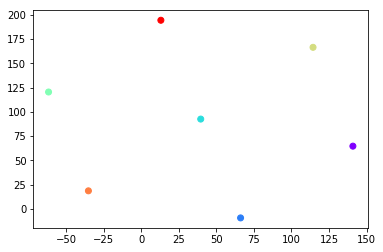

In [3]:
X = np.array(bit_lista) 
X_embedded = TSNE(n_components=2).fit_transform(X)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c = cm.rainbow(np.linspace(0, 1, len(X))))

## Clustra med K-means

[3 2 2 4 0 1 4]
[[114.37318  166.37051 ]
 [-35.271225  18.657524]
 [ 52.82628   41.651012]
 [140.92378   64.64436 ]
 [-24.410568 157.31197 ]]


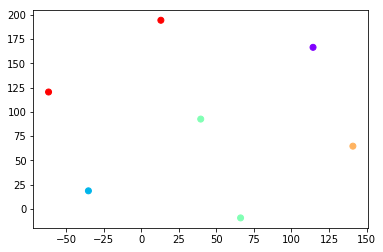

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

data= X_embedded
X = np.array(data)
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
print(kmeans.labels_)

#plt.scatter(X,X, label='True Position')  

#kmeans.predict([[0, 0], [12, 3]])

print(kmeans.cluster_centers_)  
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')  
display()


In [5]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
X

array([[140.92378 ,  64.64436 ],
       [ 66.101524,  -9.21201 ],
       [ 39.551037,  92.51404 ],
       [-61.82164 , 120.383705],
       [114.37318 , 166.37051 ],
       [-35.271225,  18.657526],
       [ 13.000499, 194.24022 ]], dtype=float32)